# 6.1 Wytłumaczalność algorytmów
Jeśli chodzi o podstawowe drzewa decyzyjne, to ich wytłumaczalność może być rozpatrywana na kilku poziomach. Możemy oczywiście generalnie określić wagi poszczególnych cech co daje nam atrybut `feature_importances_` wyliczający je za pomocą wpływu każdej z cech na impurity. Co ciekawsze, przy rozpoznawaniu obserwacji mogliśmy prześledzić kolejne warunki jakie spełniły, dzięki czemu mogliśmy wytłumaczyć się z każdej decyzji. Drzewa decyzyjne omawialiśmy jednak przy okazji rozpatrywanych zbiorów danych i nie będziemy do tego wracać. Jak jednak wytłumaczyć decyzje podjęte przez metody ensemble?

### Interpretacja modeli ensemble
Metody oparte o *bagging* i *boosting* korzystają pod spodem ze struktur drzewiastych. Jeśli ejdnak ich jest zbyt dużo, to ciężko jest prześledzić wszystkie podziały, a następnie jeszcze uwzględnić proces uśredniania czy ważenia pojedynczych decyzji. Możemy jednak zrozumieć ogólny proces decyzyjny bazując na tych samych wartościach dostarczonych w atrybucie `feature_importances_` dla całego modelu.

In [1]:
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=100, n_features=10, n_informative=4, n_redundant=2, random_state=641247)

Zaczniemy od wag zmiennych dla zwykłego drzewa decyzyjnego, żeby zobaczyć jak jego predykcje różnią się od pozostałych metod.

In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
dt_classifier = DecisionTreeClassifier(random_state=402785)
dt_classifier.fit(X, y)

DecisionTreeClassifier(random_state=402785)

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
rf_classifier = RandomForestClassifier(random_state=60245)
rf_classifier.fit(X, y)

RandomForestClassifier(random_state=60245)

In [7]:
from sklearn.ensemble import ExtraTreesClassifier

In [8]:
et_classifier = ExtraTreesClassifier(random_state=852031)
et_classifier.fit(X, y)

ExtraTreesClassifier(random_state=852031)

In [9]:
from xgboost import XGBClassifier

In [10]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [11]:
import pandas as pd

In [12]:
results_df = pd.DataFrame({
    "dt_importance": dt_classifier.feature_importances_,
    "rf_importance": rf_classifier.feature_importances_,
    "et_importance": et_classifier.feature_importances_,
    "xgb_importance": xgb_classifier.feature_importances_,
})
results_df.sample(10)

,dt_importance,rf_importance,et_importance,xgb_importance
2,0.030476,0.030832,0.053802,0.034166
9,0.069808,0.045932,0.049177,0.071605
4,0.136667,0.052963,0.066239,0.059218
8,0.000000,0.032797,0.043019,0.026202
3,0.110089,0.090840,0.099191,0.052155
7,0.581320,0.319408,0.244594,0.543794
5,0.071640,0.237227,0.239161,0.073828
0,0.000000,0.074504,0.074522,0.086967
6,0.000000,0.076244,0.082553,0.028230
1,0.000000,0.039252,0.047741,0.023835


<Axes: >

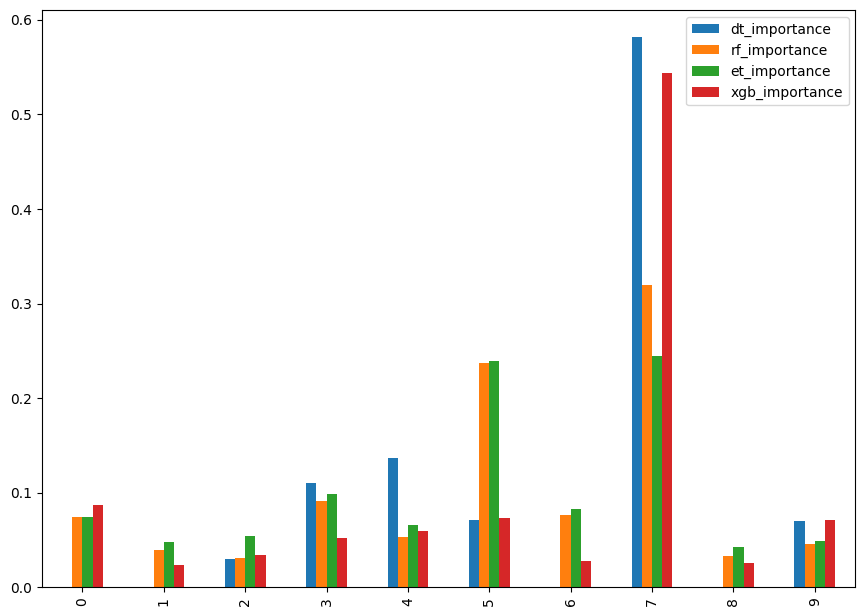

In [13]:
results_df.plot.bar(figsize=(10.5, 7.5))

W przypadku stackingu wytłumaczalność jest już sprawą bardziej skomplikowaną. Finalny estymator podejmuje bowiem decyzje bazując wyłącznie na decyzjach bazowych modeli.